In [ ]:
# Вычислим сначала критический шаг: 32kb / 8 = 4 kb. Это значит, что если n кратно (1024 для float / 512 - для double),
# то каждый элемент в столбце матрицы будет иметь одинаковый индекс в кэше.
# При n > (32 для float / 22 для double) cache miss неизмежен, т.к. матрица не может поместиться вся в кэше.

# Случай с FLOAT.
# Критический шаг равен 1024. Следовательно, если n кратно 512, то каждый 2ой элемент стобца имеют одинаковые индексы.
# Если n кратно 256 - то 4ый и т.д.

# В случае MultSimple при n = 1024 cache miss происходит практический всегда из-за того, что на каждой итерации цикла
# по k идет обращение к элементам одного и того же столбца.
# График времени выполнения MultSimple пилообразный, потому что в матрице А при n - нечетном кэш будет "забиваться" 
# менее равномерно, чем в сравнении с четным n.

# В случае MultSimpleBlock (размер блока = 10), т.к. размер блока соизмерим с числом коналов в кэше(8), 
# cache miss происходит довольно редко.
# При n = 1024 cache miss происходит в среднем 2 из 10 раз (по графикам это видно) за итерацию обработки одного блока.
# Также по графикам видно, что MultSimpleBlock в среднем в 1.5 раз быстрее, чем MultSimple, а также то, 
# что кэш "забивается" равномерно

# В случае с MutlSwappedLoops элементы матрицы С вычисляются построчно с последовательным перемножением строки из 
# матрицы А и строк из B. Таким образом, cache miss происходит только при начале вычисления новой строки матрицы С и 
# при переходе критического шага во время прогона цикла по строке B.
# Поэтому при n = 1024 изменения времени выполнения не замечается.
# Также по графикам видно, что MutlSwappedLoops в среднем в 3 раза быстрее, чем MultSimple, а также то, 
# что кэш "забивается" равномерно


# Случай с DOUBLE.
# В этом случае уменьшился критический шаг до 512 => cache miss заметен на более мелких изменениях размерах матрицы, 
# кратных 2^k.
# Это особенно видно для n = 1280 (кратного 256) и 1920 (кратного 128). На графиках это явные пики для MultSimple.

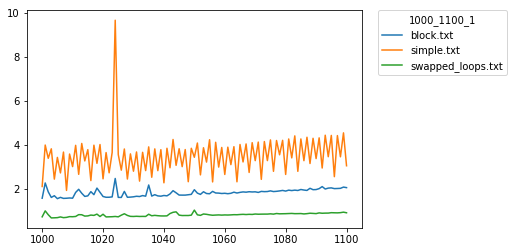

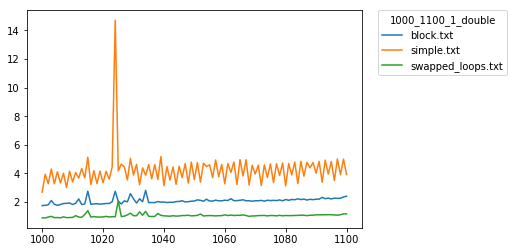

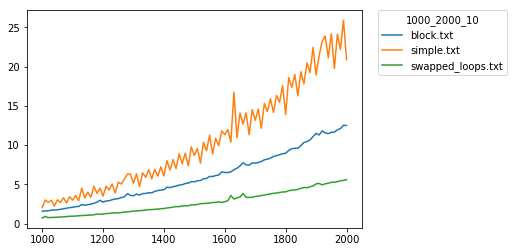

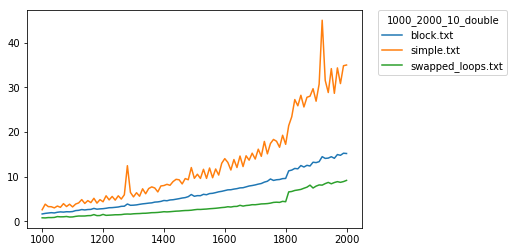

In [56]:
import os
import re
from matplotlib import pyplot as plt

def read_info_from_file(file_name):
    with open(file_name) as f:
        data = [re.findall("\(n = (\d+)\): (\d+\.\d+)", line.strip())[0] for line in f.readlines()]
        return list(zip(*data))

current_dir = os.getcwd()
sample_dirs = [os.path.join(current_dir, f) for f in os.listdir(current_dir) \
               if os.path.isdir(os.path.join(current_dir, f)) and f[0] != "."]

for sample_dir in sample_dirs:
    for sample_file in os.listdir(sample_dir):
        file = os.path.join(sample_dir, sample_file)
        x, y = read_info_from_file(file)
        plt.plot(x, y, label=sample_file)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=sample_dir.split("/")[-1])
    plt.show()
    

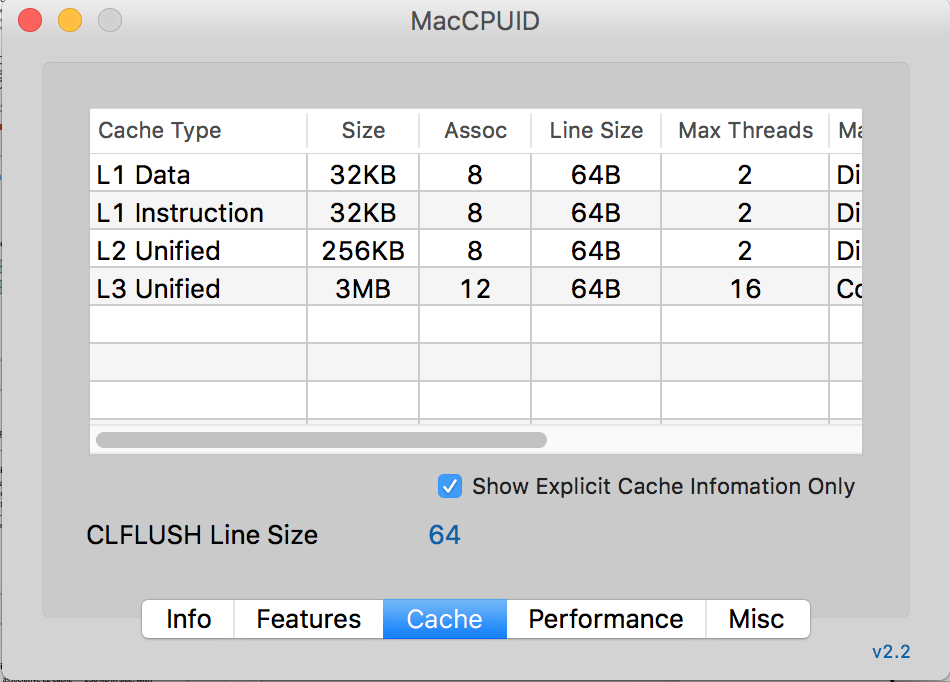

In [54]:
from IPython.display import Image
Image(filename='cpu_info.png', width = 400) 